Importamos las librerías necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import json
from shapely import wkt

%matplotlib inline

Cargamos el dataset en la variable df

In [ ]:
df = pd.read_csv("/DEvideos_cc50_202101.csv")

Obtenemos una visión general del dataset

In [ ]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Schleswig Holstein,54.783748,9.433315,POINT (9.433315388 54.78374778)
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822)
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Saarland,49.250390,6.970003,POINT (6.970003213 49.25039044)
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,Bayern,50.266607,10.966607,POINT (10.96660681 50.26660748)
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,Berlin,52.521819,13.401549,POINT (13.40154862 52.52181866)


Revisamos los datos para verificar alguna variación inusual

In [ ]:
df.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,40840.000000,4.084000e+04,4.084000e+04,4.084000e+04,4.084000e+04,40840.000000,40840.000000
mean,20.705828,6.034553e+05,2.187550e+04,1.397136e+03,2.785857e+03,51.797150,10.216911
std,6.975813,2.348963e+06,1.018000e+05,1.457738e+04,1.745803e+04,1.639008,2.042100
min,1.000000,5.180000e+02,0.000000e+00,0.000000e+00,0.000000e+00,48.999992,6.970003
25%,20.000000,2.706875e+04,5.330000e+02,2.900000e+01,7.900000e+01,50.266607,8.399993
50%,24.000000,1.192770e+05,2.699000e+03,1.340000e+02,3.760000e+02,52.029988,9.500030
75%,24.000000,4.431015e+05,1.179625e+04,5.320000e+02,1.376000e+03,53.550025,11.416699
max,44.000000,1.138762e+08,4.924056e+06,1.470386e+06,1.084435e+06,54.783748,14.329967


Identificamos posibles campos incompletos

In [ ]:
df.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


Modificamos el tipo de dato de geometry

In [ ]:
df['geometry'] = df['geometry'].apply(wkt.loads)

Visualizamos los datos para una mejor comprensión inicial de los mismos

<Axes: title={'center': 'Cantidad de videos por categoría'}, ylabel='category_name'>

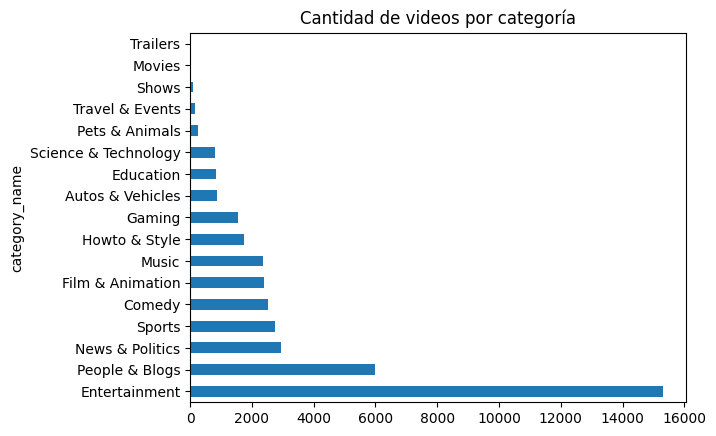

In [ ]:
#Cargamos el archivo JSON
with open("/DE_category_id.json") as f:
    categories = json.load(f)

#Mapeamos los identificadores con los nombres de categoría
category_mapping = {int(item["id"]): item["snippet"]["title"] for item in categories["items"]}
df["category_name"] = df["category_id"].map(category_mapping)

#Visualizamos
df["category_name"].value_counts().plot(kind="barh", title="Cantidad de videos por categoría")

Creamos el dataset "limpio"

In [ ]:
df.to_csv("DEvideos_limpio.csv", index=False)

#REQUERIMIENTOS


In [ ]:
df = pd.read_csv("DEvideos_limpio.csv")

**¿Qué categorías de videos son las de mayor tendencia?**

Para responder esta pregunta, se contó cuántos videos de cada categoría aparecieron en la lista de tendencias. Los resultados muestran que las categorías Entertainment, Music y People & Blogs son las más frecuentes, lo que indica que este tipo de contenido domina las preferencias del público en YouTube Alemania.



Top 10 categorías con más videos en tendencia:
          Categoría  Cantidad de Videos
0     Entertainment               15292
1    People & Blogs                5988
2   News & Politics                2935
3            Sports                2752
4            Comedy                2534
5  Film & Animation                2376
6             Music                2372
7     Howto & Style                1745
8            Gaming                1565
9  Autos & Vehicles                 873


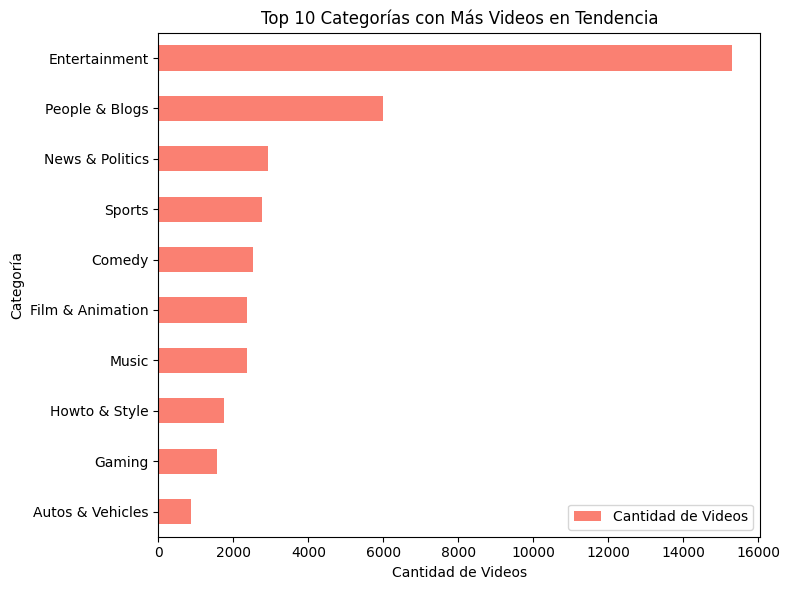

In [ ]:
# Contar cuántos videos hay por categoría
categorias_tendencia = df["category_name"].value_counts().reset_index()
categorias_tendencia.columns = ["Categoría", "Cantidad de Videos"]

# Mostrar el top 10
print("Top 10 categorías con más videos en tendencia:")
print(categorias_tendencia.head(10))

import matplotlib.pyplot as plt

categorias_tendencia.set_index("Categoría").head(10).plot(
    kind="barh", figsize=(8,6), color="salmon", title="Top 10 Categorías con Más Videos en Tendencia"
)
plt.xlabel("Cantidad de Videos")
plt.ylabel("Categoría")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?**

Se calculó la suma total de “Me gusta” por categoría. Las más populares fueron Entertainment, Music y People & Blogs, reflejando un alto nivel de aceptación e interacción positiva por parte del público. En cambio, categorías como Science & Technology, Education y Travel & Events obtuvieron menos likes, lo que sugiere un menor nivel de engagement emocional en comparación con las más populares.

Categorías que MÁS gustan (promedio de likes por video):
           category_name          likes
8                  Music  126600.786678
7                 Movies   31917.000000
1                 Comedy   29513.577348
12  Science & Technology   19073.037221
4       Film & Animation   19072.199495

Categorías que MENOS gustan:
       category_name        likes
0   Autos & Vehicles  7037.071019
16   Travel & Events  6291.035461
9    News & Politics  4903.544804
13             Shows  3540.364486
15          Trailers     0.000000


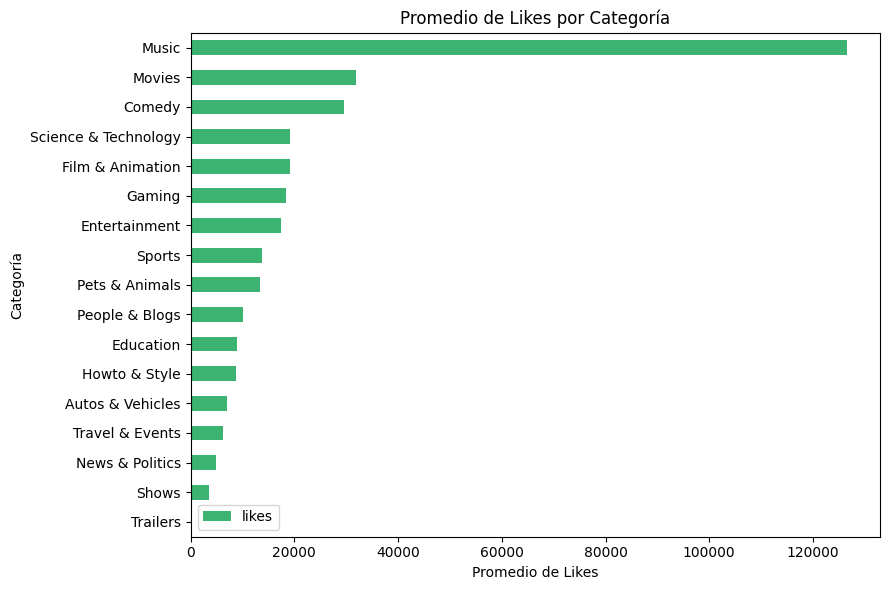

In [ ]:
df["likes"] = pd.to_numeric(df["likes"], errors="coerce")

likes_promedio = df.groupby("category_name")["likes"].mean().reset_index()

likes_promedio = likes_promedio.sort_values(by="likes", ascending=False)

print("Categorías que MÁS gustan (promedio de likes por video):")
print(likes_promedio.head(5))

print("\nCategorías que MENOS gustan:")
print(likes_promedio.tail(5))

likes_promedio.set_index("category_name").plot(
    kind="barh", figsize=(9,6), color="mediumseagreen", title="Promedio de Likes por Categoría"
)
plt.xlabel("Promedio de Likes")
plt.ylabel("Categoría")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


***¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?***

Para identificar las categorías con mejor aceptación del público, se calculó el promedio del ratio entre “Me gusta” y “No me gusta” (likes / dislikes) por categoría. Los resultados muestran que las categorías con mejor proporción son Pets & Animals (104.36 likes por cada dislike), seguida por Music (66.76), Education (57.70), Travel & Events (55.67) y Autos & Vehicles (52.97). Estas categorías reflejan una audiencia altamente satisfecha con el contenido.

En cambio, las categorías con menor ratio fueron Entertainment (34.49), Movies (28.13), News & Politics (21.95), Shows (4.73) y Trailers, esta última sin ningún “Me gusta”, lo cual indica bajo nivel de aprobación en relación a los dislikes.

 Top 5 categorías con mejor ratio Likes / Dislikes:

      category_name  like_ratio
0    Pets & Animals   96.340955
1         Education   56.361813
2             Music   54.674495
3   Travel & Events   52.391073
4  Autos & Vehicles   52.045664

 Categorías con peor ratio:

      category_name  like_ratio
12    Entertainment   32.407802
13           Movies   25.608291
14  News & Politics   20.688872
15            Shows    5.244397
16         Trailers    0.000000


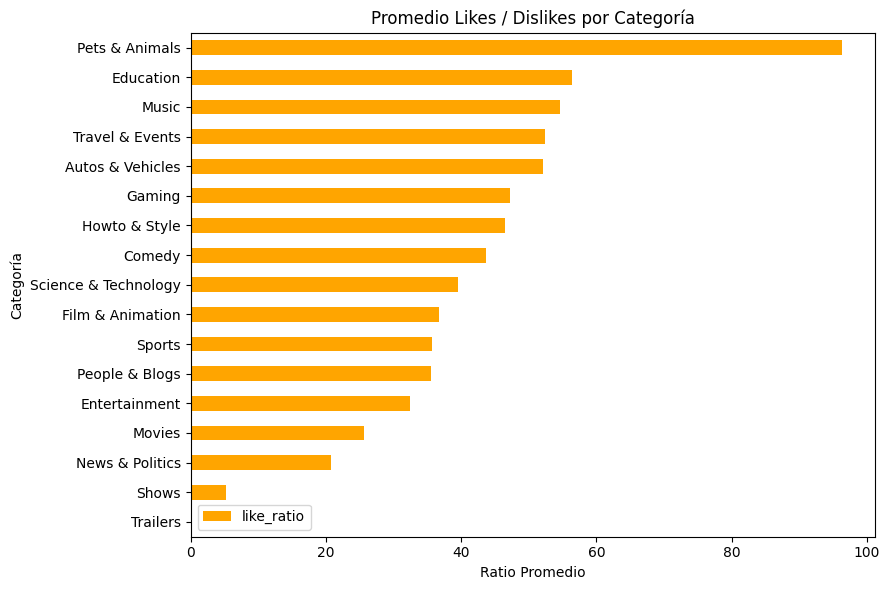

In [ ]:
# Asegurarse de que likes y dislikes sean numéricos
df["likes"] = pd.to_numeric(df["likes"], errors="coerce")
df["dislikes"] = pd.to_numeric(df["dislikes"], errors="coerce")

# Evitar divisiones por 0 reemplazando 0 por 1 en dislikes
df["dislikes"] = df["dislikes"].replace(0, 1)

# Crear la nueva columna: ratio de likes por dislike
df["like_ratio"] = df["likes"] / df["dislikes"]

# Calcular el promedio del ratio por categoría
like_ratio_por_categoria = (
    df.groupby("category_name")["like_ratio"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)


print(" Top 5 categorías con mejor ratio Likes / Dislikes:\n")
print(like_ratio_por_categoria.head(5))


print("\n Categorías con peor ratio:\n")
print(like_ratio_por_categoria.tail(5))


like_ratio_por_categoria.set_index("category_name").plot(
    kind="barh", figsize=(9,6), color="orange", title="Promedio Likes / Dislikes por Categoría"
)
plt.xlabel("Ratio Promedio")
plt.ylabel("Categoría")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?**

Para evaluar el nivel de interacción de los usuarios, se calculó el promedio del ratio entre vistas y comentarios por categoría (views / comments). Las categorías con más interacción (es decir, menos vistas por comentario) fueron Pets & Animals (339 vistas por comentario), Movies (713), Howto & Style (785), Comedy (2 508) y Travel & Events (2 799). Esto indica que estas categorías generan una mayor participación del público en forma de comentarios.

En cambio, las categorías con menos interacción fueron Science & Technology (44 094 vistas por comentario), News & Politics (14 823), Education (14 316), Autos & Vehicles (10 596) y Sports (9 265), lo que sugiere un público más pasivo o menos propenso a dejar comentarios en esos contenidos.

 Categorías con más interacción (menos vistas por comentario):
     category_name  views_per_comment
0   Pets & Animals         351.339905
1           Movies         888.331439
2    Howto & Style        1133.864722
3           Comedy        3229.123834
4  Travel & Events        4885.392216

 Categorías con menos interacción:
           category_name  views_per_comment
12      Film & Animation       18349.023448
13                Sports       19020.564164
14       News & Politics       25601.662731
15        People & Blogs       34377.330843
16  Science & Technology       49378.396429


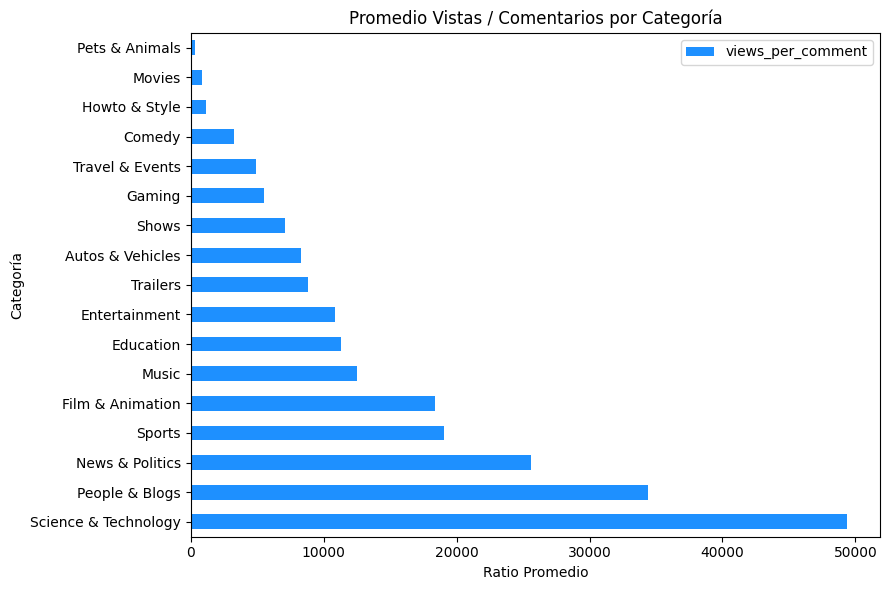

In [ ]:
# Asegurar que views y comment_count sean numéricos
df["views"] = pd.to_numeric(df["views"], errors="coerce")
df["comment_count"] = pd.to_numeric(df["comment_count"], errors="coerce")

# Evitar divisiones por 0
df["views"] = df["views"].fillna(0)
df["comment_count"] = df["comment_count"].replace(0, 1)

# Crear nueva columna: ratio de vistas por comentario
df["views_per_comment"] = df["views"] / df["comment_count"]

# Calcular promedio por categoría
views_comment_ratio = (
    df.groupby("category_name")["views_per_comment"]
    .mean()
    .sort_values()
    .reset_index()
)

# Mostrar las 5 categorías con mejor interacción (menor ratio vistas/comentario)
print(" Categorías con más interacción (menos vistas por comentario):")
print(views_comment_ratio.head(5))

# Mostrar las 5 con menos interacción
print("\n Categorías con menos interacción:")
print(views_comment_ratio.tail(5))

views_comment_ratio.set_index("category_name").plot(
    kind="barh", figsize=(9,6), color="dodgerblue", title="Promedio Vistas / Comentarios por Categoría"
)
plt.xlabel("Ratio Promedio")
plt.ylabel("Categoría")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?**

Según el gráfico de cantidad de videos en tendencia por día, observamos lo siguiente:

- Variación considerable al inicio del período, con días que alcanzan cerca de 200 videos en tendencia.
- Luego se observa una disminución progresiva y cierta estabilización, manteniéndose entre 130 y 160 videos por día.
- Hay algunos picos y caídas abruptas, lo que puede deberse a días atípicos o falta de datos en ciertas fechas.

/tmp/ipython-input-54-883409872.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["trending_date"] = pd.to_datetime(df["trending_date"], errors="coerce")


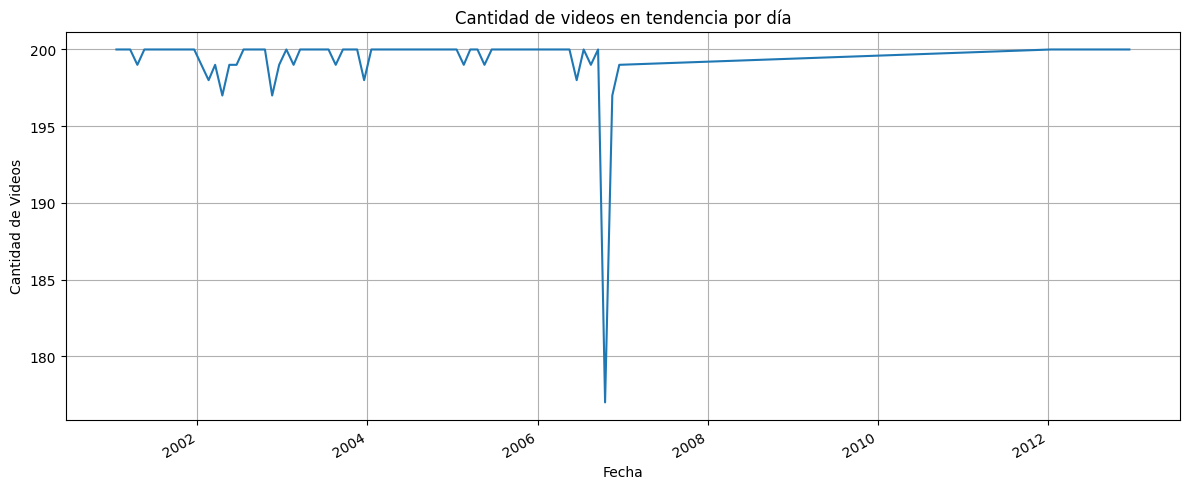

In [ ]:
# Asegurarse de que trending_date esté en formato datetime
df["trending_date"] = pd.to_datetime(df["trending_date"], errors="coerce")

# Agrupar por fecha y contar cantidad de videos por día
tendencia_diaria = df.groupby("trending_date").size()


plt.figure(figsize=(12,5))
tendencia_diaria.plot()
plt.title("Cantidad de videos en tendencia por día")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Videos")
plt.tight_layout()
plt.grid(True)
plt.show()


**¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?**

Los canales de YouTube que aparecen con mayor frecuencia en tendencia son Анатолий Шарий, Promiflash, Ruhrpottwache, Auf Streife y Galileo, con más de 140 videos cada uno en tendencia, lo que refleja su alta popularidad y presencia constante en la plataforma. Por otro lado, canales como cevamarunt, DailyProFootball, Die Allestester, MrOAKcheese y achse:ostwest solo lograron aparecer una vez en las tendencias, lo que indica una presencia puntual o menor alcance en comparación con los anteriores.




In [ ]:
# Contar cuántas veces aparece cada canal
canales_tendencia = df['channel_title'].value_counts().reset_index()
canales_tendencia.columns = ['channel_title', 'cantidad']

# Mostrar los 5 canales con más apariciones
print(" Canales con más videos en tendencia:")
print(canales_tendencia.head(5))

# Mostrar los 5 canales con menos apariciones (sólo 1 vez en tendencia)
print("\n Canales con menos videos en tendencia:")
print(canales_tendencia[canales_tendencia['cantidad'] == 1].head(5))


 Canales con más videos en tendencia:
    channel_title  cantidad
0         Galileo       200
1   Ruhrpottwache       185
2  Анатолий Шарий       182
3           Çukur       180
4     Auf Streife       180

 Canales con menos videos en tendencia:
                 channel_title  cantidad
3600        Nadorcity-Official         1
3601             Felix Studios         1
3602              Sagopakajmer         1
3603  Schiffe und Kreuzfahrten         1
3604         Gutiérris Extreme         1


**¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?**

Al analizar el ratio de "Me gusta por comentario" como una medida de comentarios positivos, se observa que los videos con mayor puntuación (como Jack and Tim receive GOLDEN BUZZER o Little Mix bring the Power) tienen ratios muy altos, superando los 90 000 likes por comentario. Sin embargo, un patrón claro es que todos estos videos solo estuvieron un día en tendencia, lo cual sugiere que su impacto fue intenso pero breve.

Esto indica que no necesariamente los videos más estables o recurrentes en tendencia son los que reciben más comentarios positivos. En cambio, algunos videos excepcionales, por su emotividad o viralidad, pueden generar una alta proporción de reacciones positivas en un solo día.



In [ ]:
df["comment_count"] = df["comment_count"].replace(0, 1)

# Crear la columna de likes por comentario
df["likes_per_comment"] = df["likes"] / df["comment_count"]

# Ver los 10 videos con más comentarios positivos
top_videos = (
    df[["title", "likes_per_comment", "trending_date"]]
    .sort_values("likes_per_comment", ascending=False)
    .drop_duplicates("title")
    .head(10)
)

dias_tendencia = df["title"].value_counts()
top_videos["dias_en_tendencia"] = top_videos["title"].map(dias_tendencia)

# Mostrar resultados
print("Top 10 videos con más likes por comentario:\n")
print(top_videos[["title", "likes_per_comment", "dias_en_tendencia"]])


Top 10 videos con más likes por comentario:

                                                   title  likes_per_comment  \
29188  Marc Spelmann gets the first Golden Buzzer of ...           151905.0   
32007  Jack and Tim receive GOLDEN BUZZER from Simon ...           103628.0   
4242   Little Mix bring the Power & CNCO to The X Fac...            99783.0   
17181  Tide | Super Bowl LII 2018 Commercial | It's a...            89880.0   
33484  Donchez bags a GOLDEN BUZZER with his Wiggle a...            75108.0   
13503                     We Ask Kids How Trump is Doing            64666.0   
22432      HomePod — Welcome Home by Spike Jonze — Apple            63317.0   
14316    Ellen Reunites Superfan with Her Navy Boyfriend            48339.0   
13247                        Michigan Meteor Jan 16 2018            42599.0   
15015  DJ Khaled, Rihanna - Wild Thoughts (2018 Live ...            42556.0   

       dias_en_tendencia  
29188                  3  
32007                  2  
4242

**¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”? **

Sí, es posible predecir métricas como vistas o me gusta usando modelos de machine learning en Python, como regresión lineal. Con variables como número de comentarios, dislikes y categoría, se puede construir un modelo que estime esas métricas. Sin embargo, como el dataset no incluye factores clave (como duración del video o comportamiento del usuario), la precisión sería limitada.



¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?

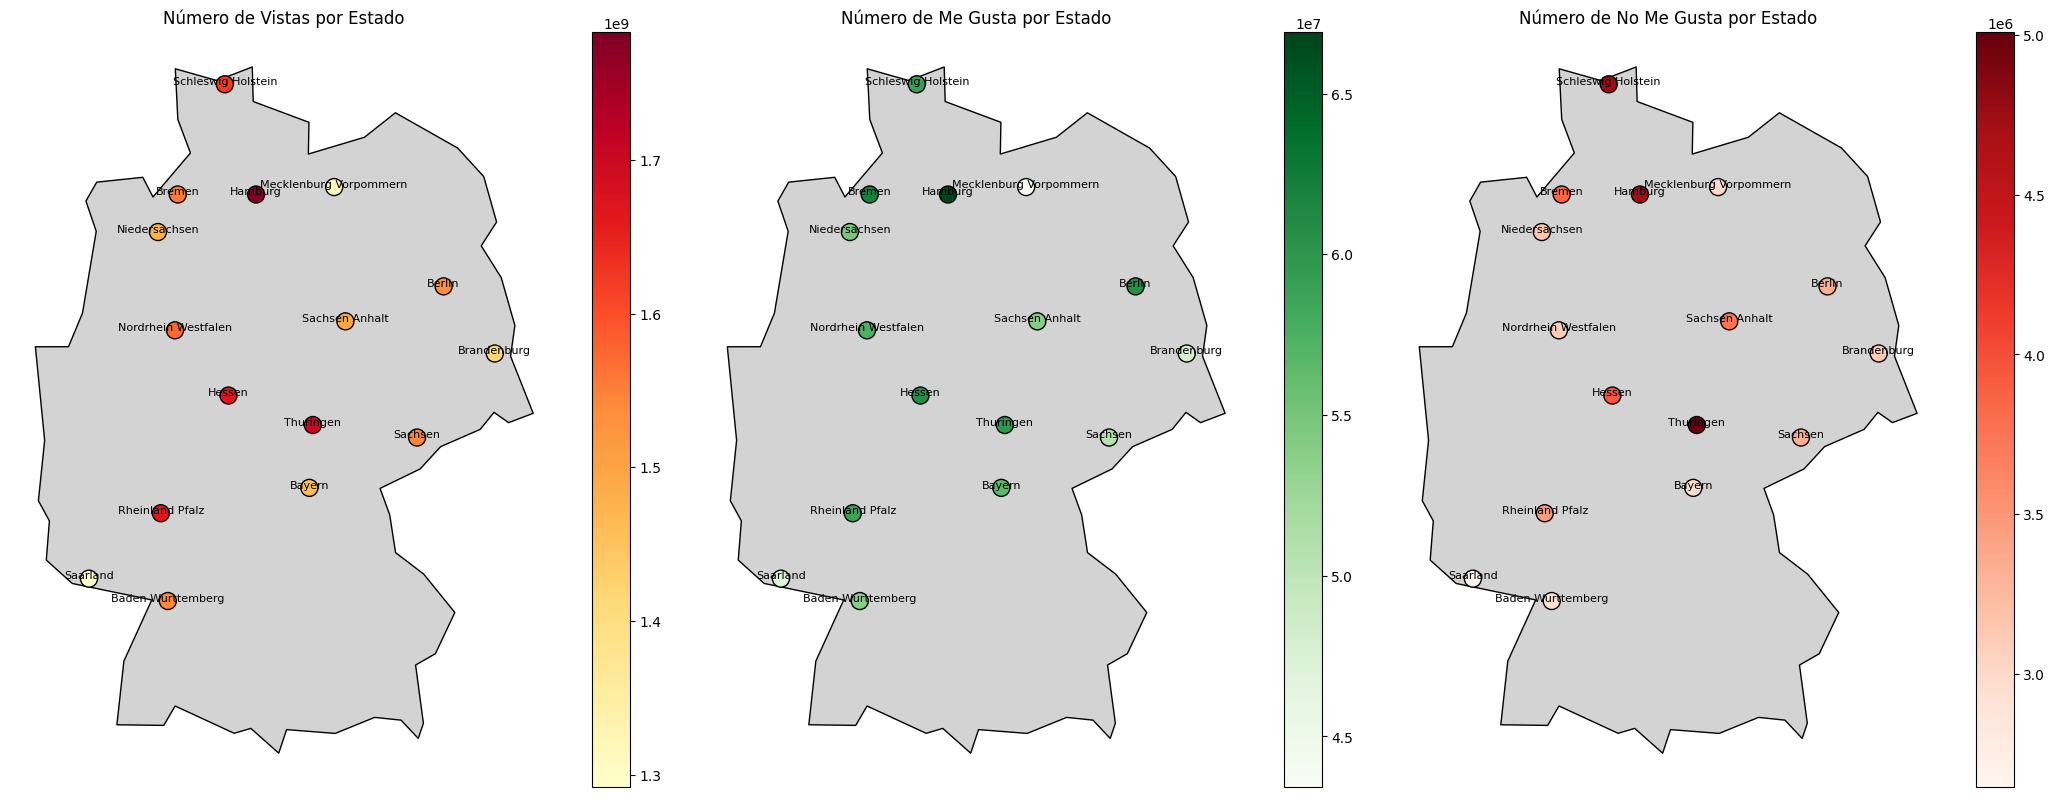

In [ ]:
world = gpd.read_file("/ne_110m_admin_0_countries.shp")

germany = world[world["ADMIN"] == "Germany"]

#Agrupamos por estado con sumas y geometry
df_grouped = df.groupby("state").agg({
    "views": "sum",
    "likes": "sum",
    "dislikes": "sum",
    "geometry": "first"
}).reset_index()

#Creamos el GeoDataFrame con puntos por estado
gdf = gpd.GeoDataFrame(
    df_grouped,
    geometry="geometry",
    crs="EPSG:4326"
)

#Graficamos mapas
fig, ax = plt.subplots(1, 3, figsize=(21, 8))

#Likes
germany.plot(ax=ax[0], color="lightgray", edgecolor="black")
gdf.plot(
    ax=ax[0],
    column="views",
    cmap="YlOrRd",
    legend=True,
    markersize=150,
    edgecolor="black"
)
ax[0].set_title("Número de Vistas por Estado")
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["state"]):
    ax[0].text(x, y, label, fontsize=8, ha="center")

#Likes
germany.plot(ax=ax[1], color="lightgray", edgecolor="black")
gdf.plot(
    ax=ax[1],
    column="likes",
    cmap="Greens",
    legend=True,
    markersize=150,
    edgecolor="black"
)
ax[1].set_title("Número de Me Gusta por Estado")
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["state"]):
    ax[1].text(x, y, label, fontsize=8, ha="center")

#Dislikes
germany.plot(ax=ax[2], color="lightgray", edgecolor="black")
gdf.plot(
    ax=ax[2],
    column="dislikes",
    cmap="Reds",
    legend=True,
    markersize=150,
    edgecolor="black"
)
ax[2].set_title("Número de No Me Gusta por Estado")
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["state"]):
    ax[2].text(x, y, label, fontsize=8, ha="center")


for a in ax:
    a.set_axis_off()
plt.tight_layout()
plt.show()

#Modelado de datos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
import pandas as pd
import numpy as np

df = pd.read_csv("DEvideos_cc50_202101.csv", encoding="latin1")

df['like_ratio'] = df['likes'] / df['dislikes'].replace(0, np.nan)
df['comments_per_view'] = df['comment_count'] / df['views'].replace(0, np.nan)
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['horas_desde_publicacion'] = (df['publish_time'].max() - df['publish_time']).dt.total_seconds() / 3600
df['tag_count'] = df['tags'].apply(lambda x: len(str(x).split('|')) if pd.notnull(x) else 0)
df['title_length'] = df['title'].apply(lambda x: len(str(x)))
df['channel_name_length'] = df['channel_title'].apply(lambda x: len(str(x)))
df['has_description'] = df['description'].apply(lambda x: 0 if pd.isnull(x) or x.strip() == '' else 1)

np.random.seed(42)

# Features seleccionadas
features = [
    "likes", "dislikes", "comment_count", "like_ratio", "comments_per_view",
    "horas_desde_publicacion", "tag_count", "title_length", "has_description",
    "channel_name_length"
]

# Log-transformar la variable objetivo
df_model = df[features + ["views"]].dropna()
X = df_model[features]
y_log = np.log1p(df_model["views"])

# División en train/test
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# Modelo XGBoost
modelo = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
modelo.fit(X_train, y_train_log)

# Predicción y des-transformación logarítmica
y_pred_log = modelo.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
r2 = r2_score(y_test, y_pred)

resultado_df = pd.DataFrame({
    "views_reales": y_test.values,
    "views_predichos": y_pred
}).round(2)
resultado_df["views_reales"] = resultado_df["views_reales"].apply(lambda x: f"{x:,.0f}")
resultado_df["views_predichos"] = resultado_df["views_predichos"].apply(lambda x: f"{x:,.0f}")

print(f"MAE  : {mae:,.2f}")
print(f"RMSE : {rmse:,.2f}")
print(f"R²   : {r2:.4f}")
print(f"R²   : {r2 * 100:.2f}%")
print("\nPrimeras predicciones:")
print(resultado_df.head(20))

MAE  : 53,694.18
RMSE : 527,171.49
R²   : 0.9518
R²   : 95.18%

Primeras predicciones:
   views_reales views_predichos
0        16,758          17,189
1       101,102         106,508
2       169,545         167,717
3        32,527          34,085
4     3,079,471       3,214,427
5       196,070         192,252
6       538,124         535,194
7        15,813          16,131
8         4,367           4,729
9        46,971          44,358
10      127,994         119,987
11      308,060         323,718
12       80,467          81,340
13    1,160,409       1,172,975
14       40,950          41,269
15      667,712         702,847
16   37,736,281      39,180,144
17      112,533         110,587
18      572,681         625,256
19    1,380,898       1,333,134


## Gráficos
Dispersión de views

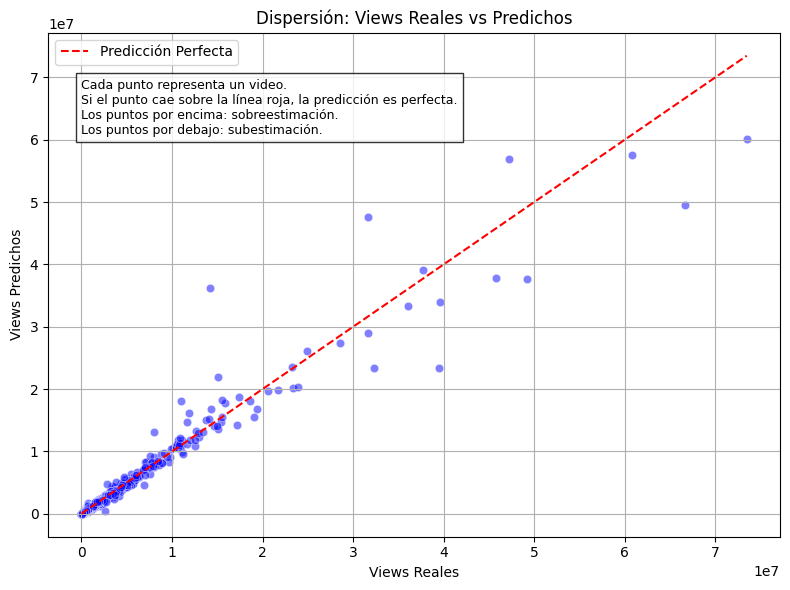

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="blue")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Predicción Perfecta")

plt.xlabel("Views Reales")
plt.ylabel("Views Predichos")
plt.title("Dispersión: Views Reales vs Predichos")

plt.text(
    x=y_test.min(),
    y=y_test.max() * 0.95,
    s=(
        "Cada punto representa un video.\n"
        "Si el punto cae sobre la línea roja, la predicción es perfecta.\n"
        "Los puntos por encima: sobreestimación.\n"
        "Los puntos por debajo: subestimación."
    ),
    fontsize=9,
    bbox=dict(facecolor='white', alpha=0.8),
    verticalalignment='top'
)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Comparación de Views predichas y reales

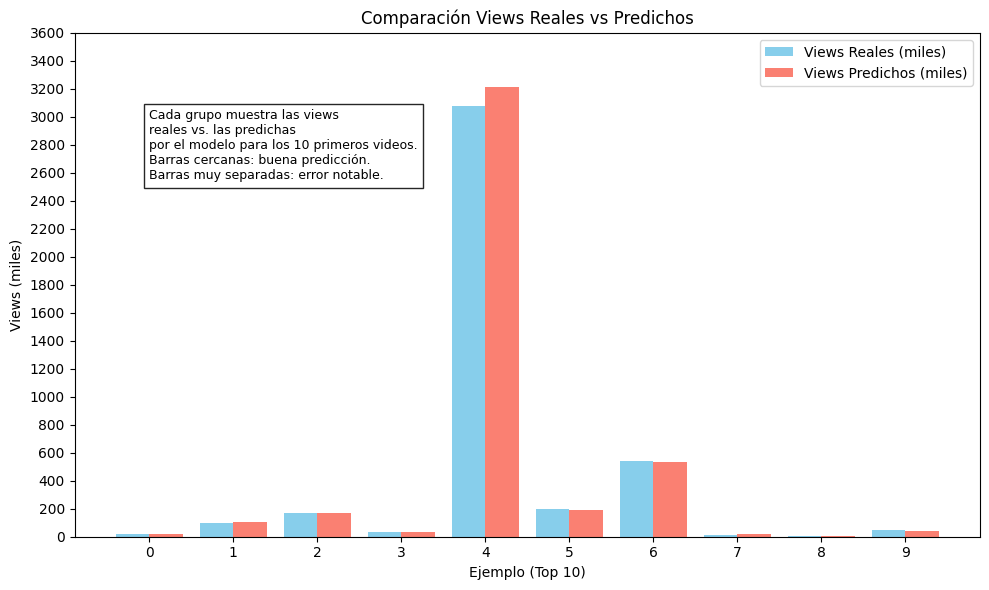

In [ ]:
resultado_plot = resultado_df.head(10).copy()

reales = resultado_plot["views_reales"].replace(",", "", regex=True).astype(float) / 1_000
predichos = resultado_plot["views_predichos"].replace(",", "", regex=True).astype(float) / 1_000

x = np.arange(len(resultado_plot))
bar_width = 0.4

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, reales, width=bar_width, label="Views Reales (miles)", color="skyblue")
plt.bar(x + bar_width/2, predichos, width=bar_width, label="Views Predichos (miles)", color="salmon")

plt.xlabel("Ejemplo (Top 10)")
plt.ylabel("Views (miles)")
plt.title("Comparación Views Reales vs Predichos")

max_val = max(reales.max(), predichos.max())
plt.yticks(np.arange(0, max_val + 500, 200))

plt.text(
    x=0,
    y=max_val * 0.95,
    s=(
        "Cada grupo muestra las views\n"
        "reales vs. las predichas\n"
        "por el modelo para los 10 primeros videos.\n"
        "Barras cercanas: buena predicción.\n"
        "Barras muy separadas: error notable."
    ),
    fontsize=9,
    bbox=dict(facecolor='white', alpha=0.85),
    verticalalignment='top'
)

plt.xticks(x, resultado_plot.index.astype(str))
plt.legend()
plt.tight_layout()
plt.show()

Curva de Views Reales y Predichos (ordenadas)

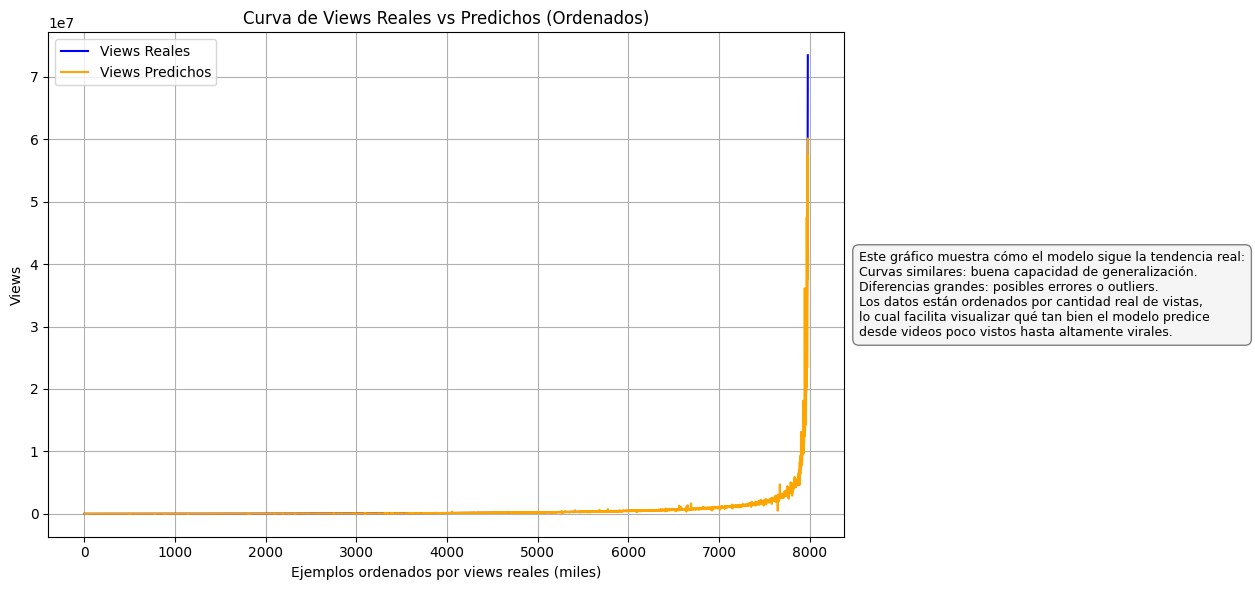

In [ ]:
ordenados = pd.DataFrame({
    'real': y_test,
    'predicho': y_pred
}).sort_values(by='real').reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(ordenados['real'], label='Views Reales', color='blue')
plt.plot(ordenados['predicho'], label='Views Predichos', color='orange')
plt.title("Curva de Views Reales vs Predichos (Ordenados)")
plt.xlabel("Ejemplos ordenados por views reales (miles)")
plt.ylabel("Views")
plt.legend()

explicacion = (
    "Este gráfico muestra cómo el modelo sigue la tendencia real:\n"
    "Curvas similares: buena capacidad de generalización.\n"
    "Diferencias grandes: posibles errores o outliers.\n"
    "Los datos están ordenados por cantidad real de vistas,\n"
    "lo cual facilita visualizar qué tan bien el modelo predice\n"
    "desde videos poco vistos hasta altamente virales."
)

props = dict(boxstyle='round,pad=0.5', facecolor='whitesmoke', edgecolor='gray')
plt.gcf().text(0.72, 0.5, explicacion, fontsize=9, bbox=props, verticalalignment='center')

plt.tight_layout(rect=[0, 0, 0.72, 1])  # Reservar espacio para el texto
plt.grid(True)
plt.show()